In [ ]:
!pip install imblearn

!pip install category_encoders

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read file directly
file_path = '/content/drive/MyDrive/cleaned - Superstore  - Sample - Superstore 2.csv'
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create the target variable
df['Profitable'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,1
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,1
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,1


**Step 2: Perform Exploratory Data Analysis (EDA)**

1.  Data Understanding:

In [ ]:
df.shape

(9994, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])

In [ ]:
# Maximum value in the 'Order Date' column
max_order_date = df['Order Date'].max()

# Minimum value in the 'Order Date' column
min_order_date = df['Order Date'].min()

print("Maximum Order Date:", max_order_date)
print("Minimum Order Date:", min_order_date)

Maximum Order Date: 2017-12-30 00:00:00
Minimum Order Date: 2014-01-03 00:00:00


2. Data Preparation

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:

#feature creation (profit per unit)
df['profit per unit'] = df['Quantity'] / (df['Profit'] + 1e-10) # Add a small constant to the denominator

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable,profit per unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,0.047717
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1,0.013662
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1,0.291062
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0,-0.013054
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1,0.794786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,0.731208
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,1,0.127933
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,1,0.103129
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,1,0.300300


In [ ]:
background_color = "#011845"

# Set default figure properties
plt.rcParams['figure.facecolor'] = background_color
plt.rcParams['axes.facecolor'] = background_color
plt.rcParams['savefig.facecolor'] = background_color
plt.rcParams['axes.edgecolor'] = 'white'  # White edges for contrast
plt.rcParams['xtick.color'] = 'white'    # White ticks
plt.rcParams['ytick.color'] = 'white'    # White ticks
plt.rcParams['text.color'] = 'white'     # White text
plt.rcParams['axes.labelcolor'] = 'white'  # White labels
plt.rcParams['axes.titlecolor'] = 'white'  # White title

# Custom palette for vibrant colors
custom_palette = ['#5827A3', '#EE5FFF', '#e4d2fc', '#48218D','#C256EF','#1627EF']



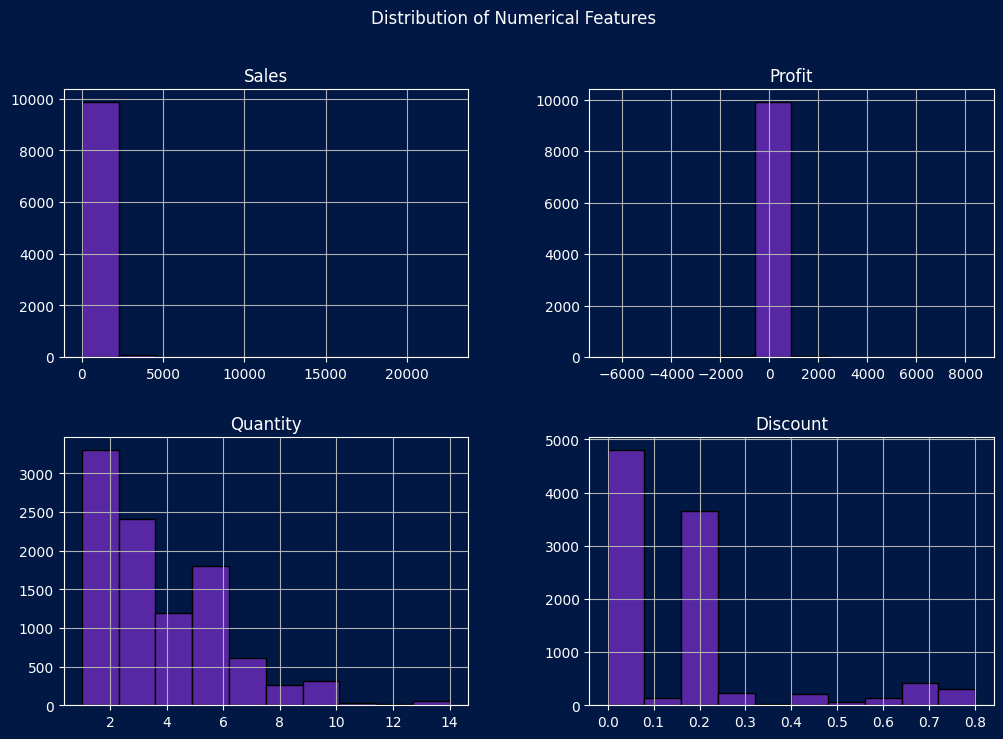

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

# Plot histograms for numerical features
df[numerical_cols].hist(bins=10, figsize=(12, 8), color=custom_palette[0], edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()


3. Feature Understanding

1.   Numerical features

    *   Sales
    *   Quantity
    *   Discount
    *   Profit
    *   profit per unit

**Overview Metrics**

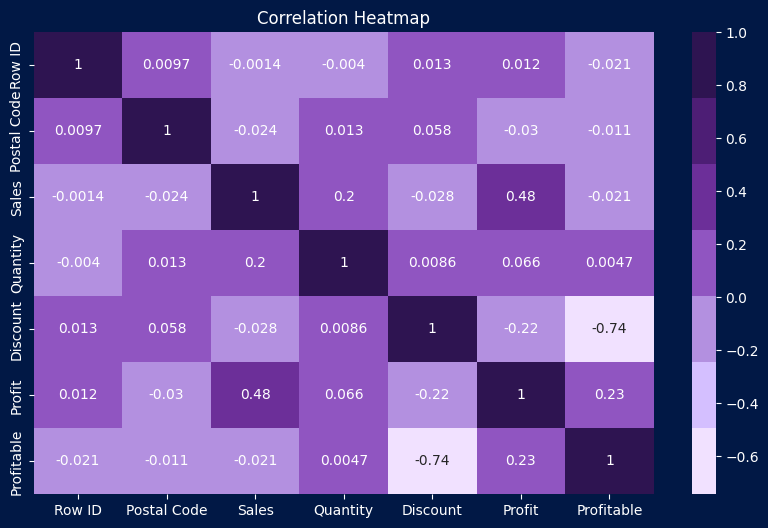

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation

my_colors = [
   "#F1E1FF",  # Very light lavender
    "#D4BFFF",  # Soft lavender
    "#B390E0",  # Light purple
    "#9055C1",  # Medium purple
    "#6C2F99",  # Deep purple
    "#4D1E75",  # Rich dark purple
    "#2E1451",  # Very dark purple
]



cmap = sns.color_palette(my_colors, as_cmap=True)
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), cmap=cmap, annot=True)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Define custom colors for the pair plot
custom_palettee = sns.color_palette("Purples")

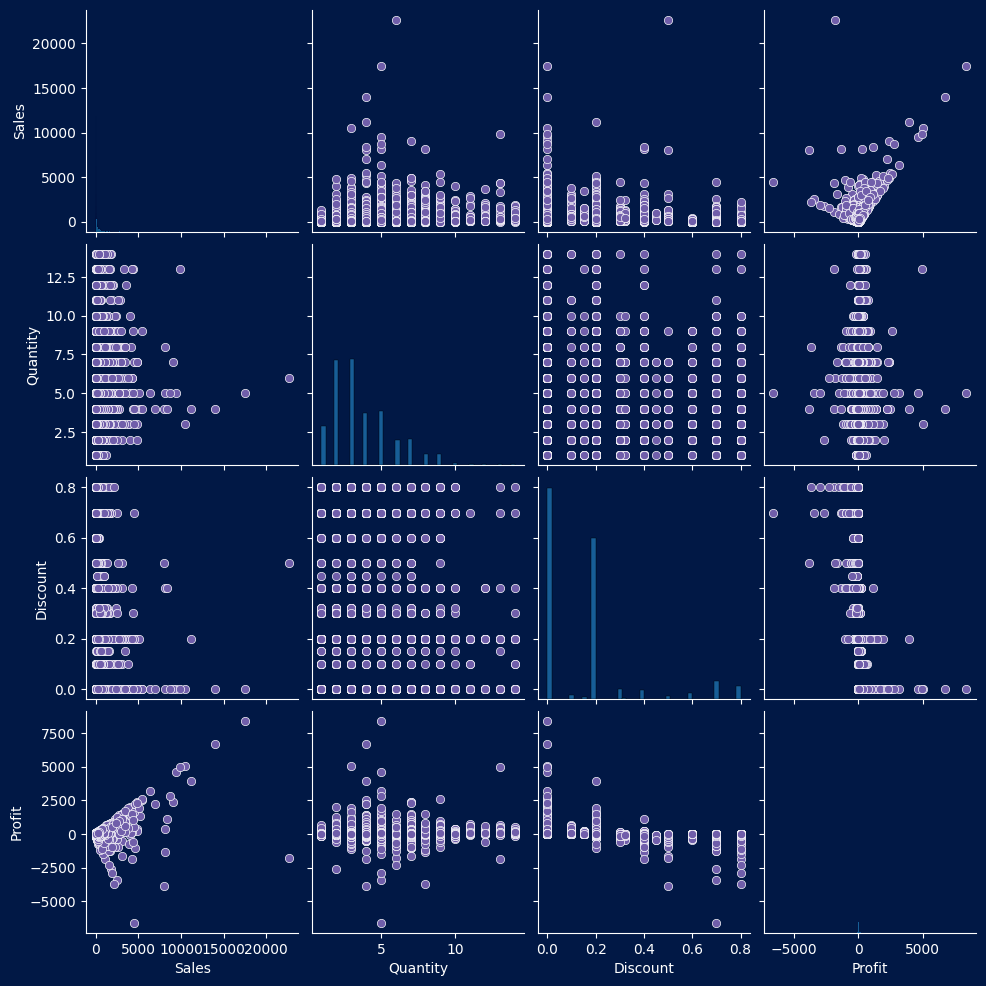

In [ ]:


# Create pair plots
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']],
             plot_kws={'color': custom_palettee[4]})  # Choose a specific purple shade
plt.show()

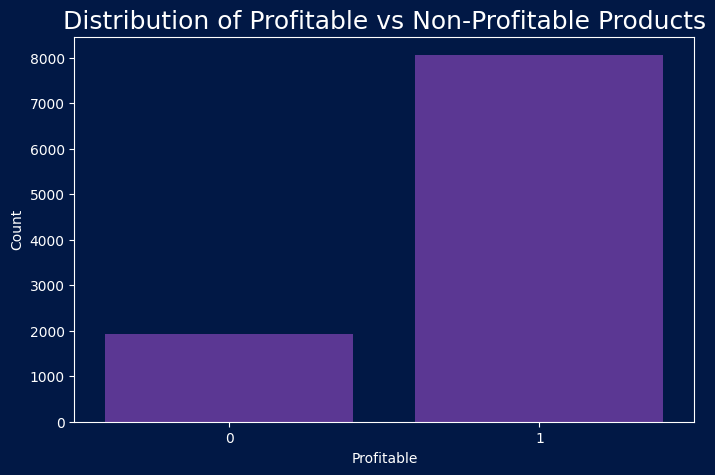

In [ ]:
# Check the distribution of the target variable 'Profitable'
plt.figure(figsize=(8, 5))
sns.countplot(x='Profitable', data=df, color=custom_palette[0])
plt.title('Distribution of Profitable vs Non-Profitable Products', fontsize=18)
plt.xlabel('Profitable')
plt.ylabel('Count')
plt.show()

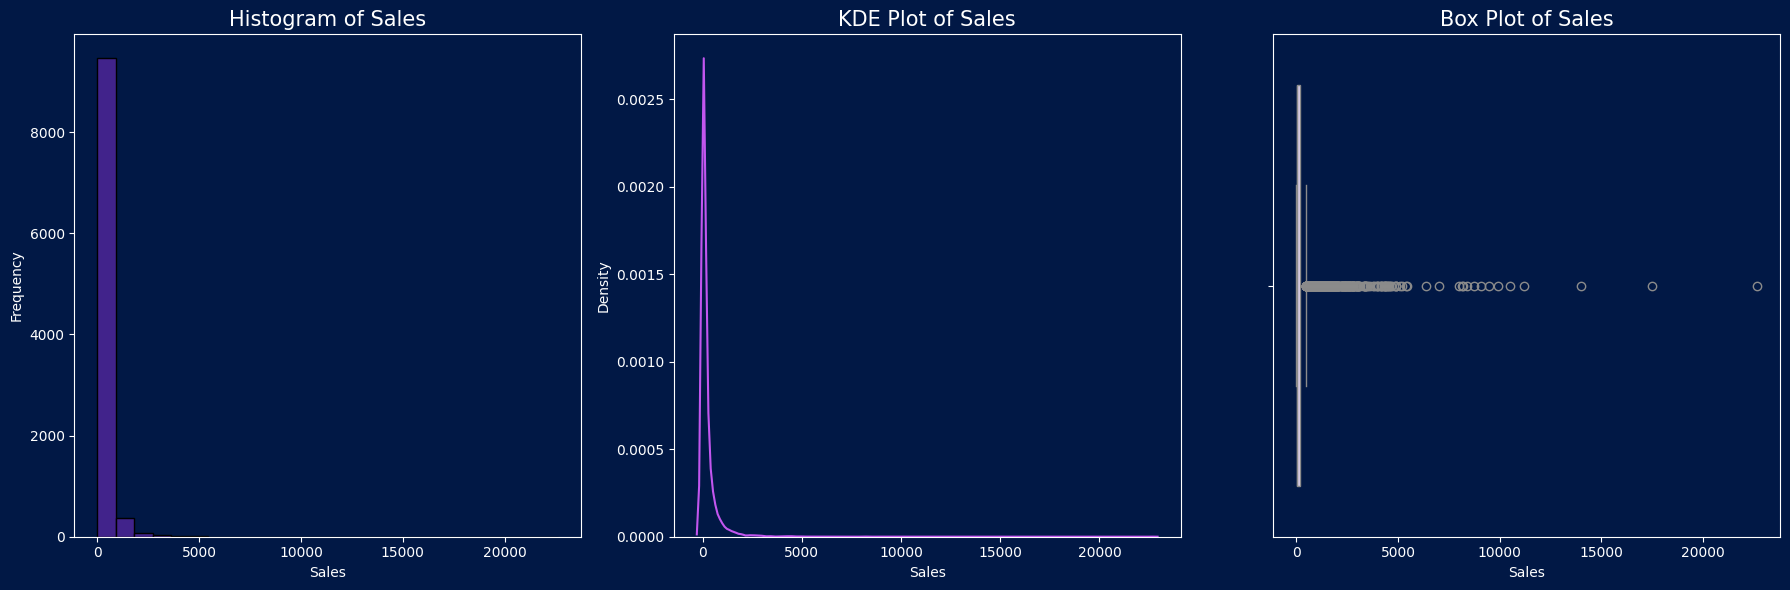

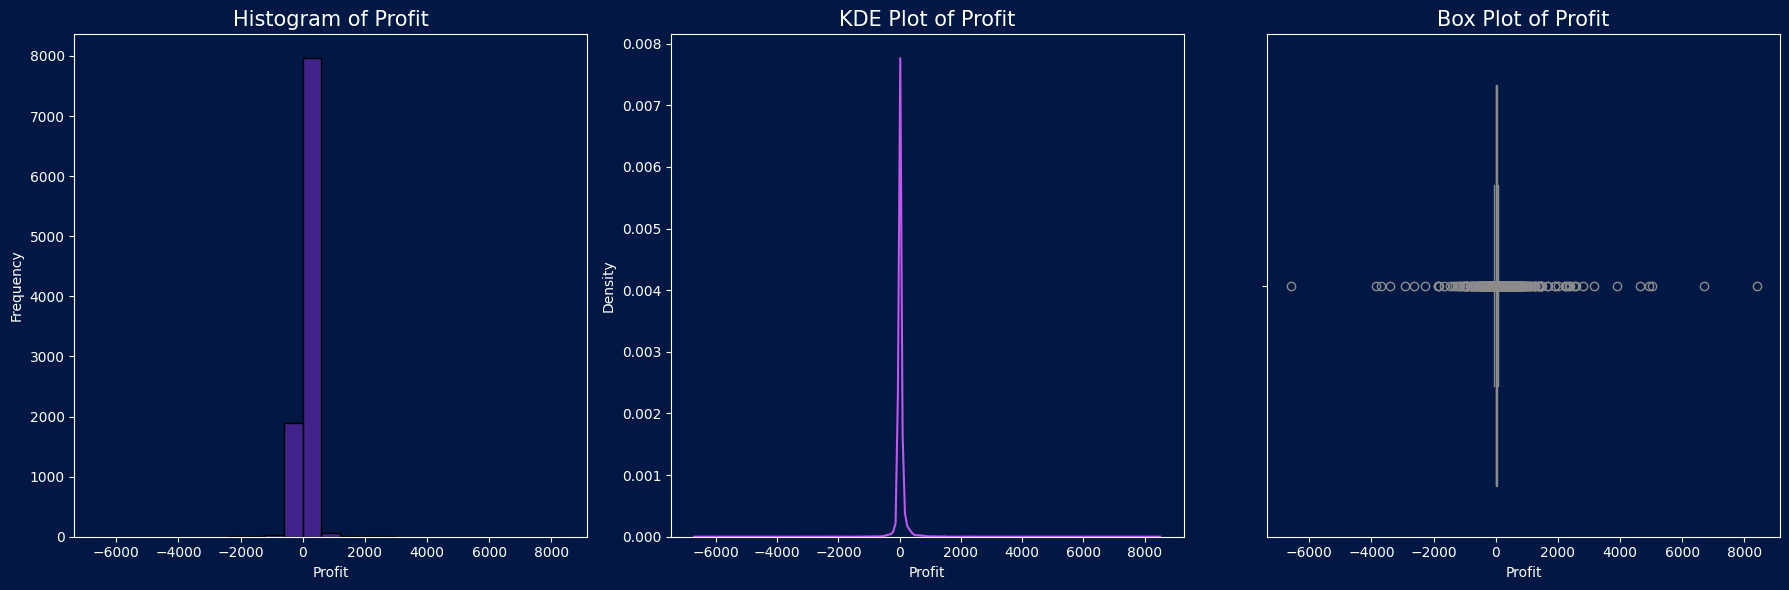

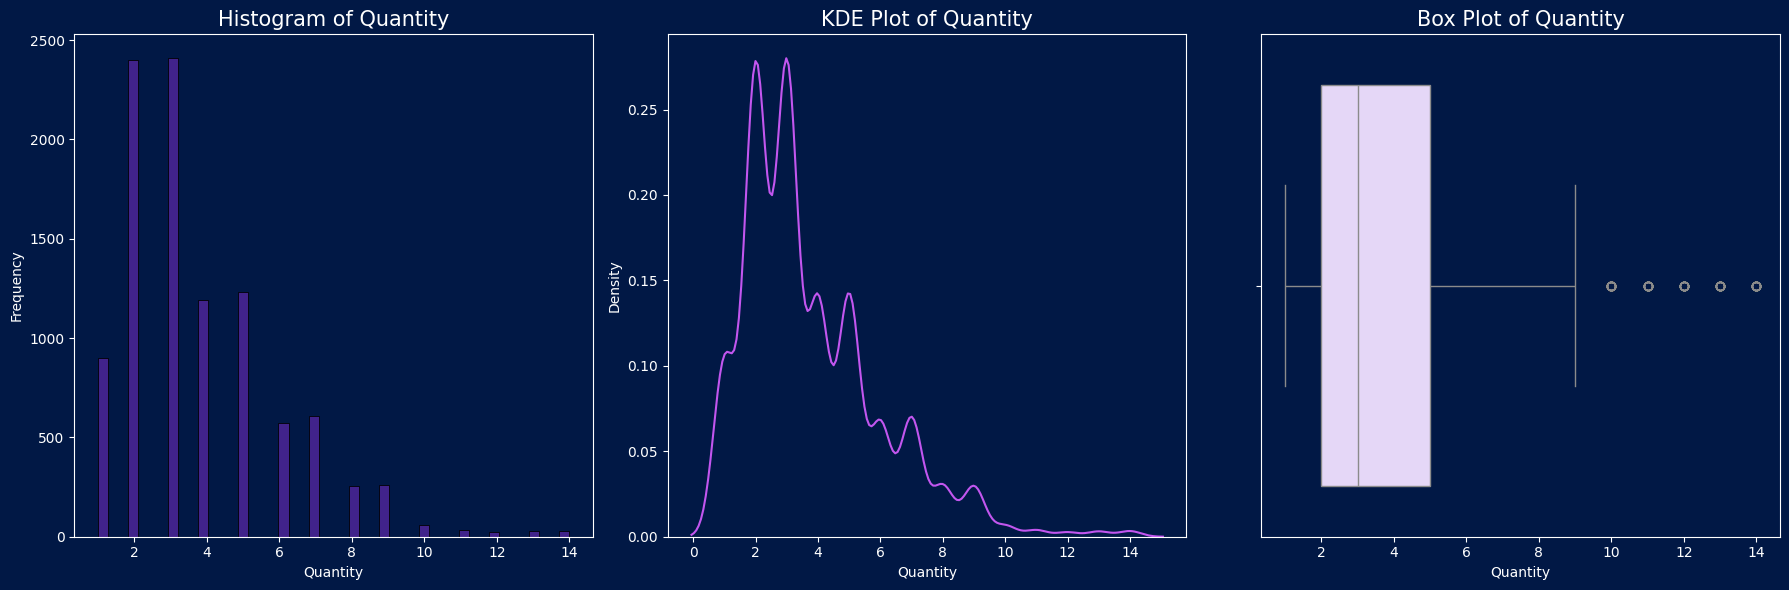

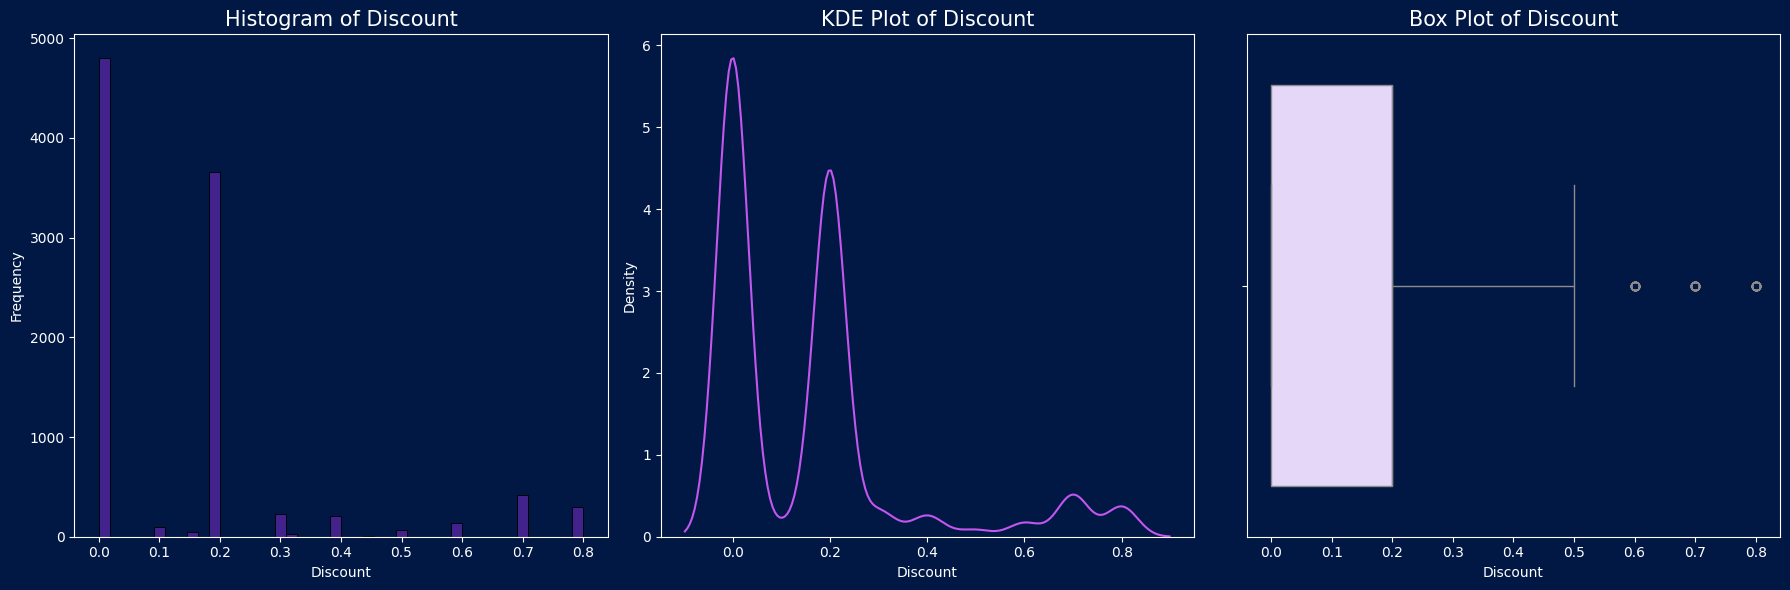

In [ ]:

features= ['Sales','Profit','Quantity','Discount','profit per unit']
# Create visualizations for each numerical feature
for i, col in enumerate(features):
    bins = 'auto'
    if i in [0, 1]:
        bins = 25

    # Initialize a figure for grouped plots
    plt.figure(figsize=(18, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=col, bins=bins, color=custom_palette[0])
    plt.title(f'Histogram of {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(data=df, x=col, color=custom_palette[4])
    plt.title(f'KDE Plot of {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Density')

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(data=df, x=col, color=custom_palette[2])
    plt.title(f'Box Plot of {col}', fontsize=15)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


2. Categorical features

* Ship Mode
*  Segment
*  city
*  state
*  Region
*  category
* Sub-Category
* Product Name



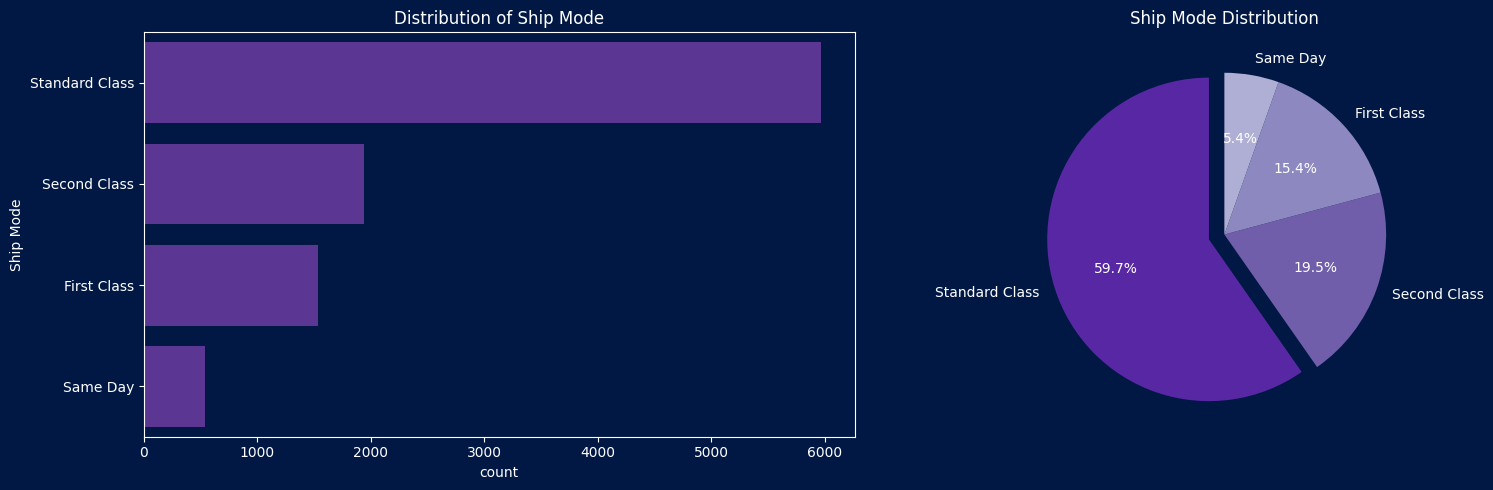

In [ ]:
# Ship Mode Distribution:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Ship Mode'], order=df['Ship Mode'].value_counts().index,color=custom_palette[0])
plt.title("Distribution of Ship Mode")
plt.subplot(122)
ship_mode_counts = df['Ship Mode'].value_counts()
explode = [0.1] + [0] * (len(ship_mode_counts) - 1)
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=90, explode=explode,colors=[custom_palette[0],custom_palettee[4],custom_palettee[3],custom_palettee[2]])
plt.title("Ship Mode Distribution")
plt.tight_layout()
plt.show()

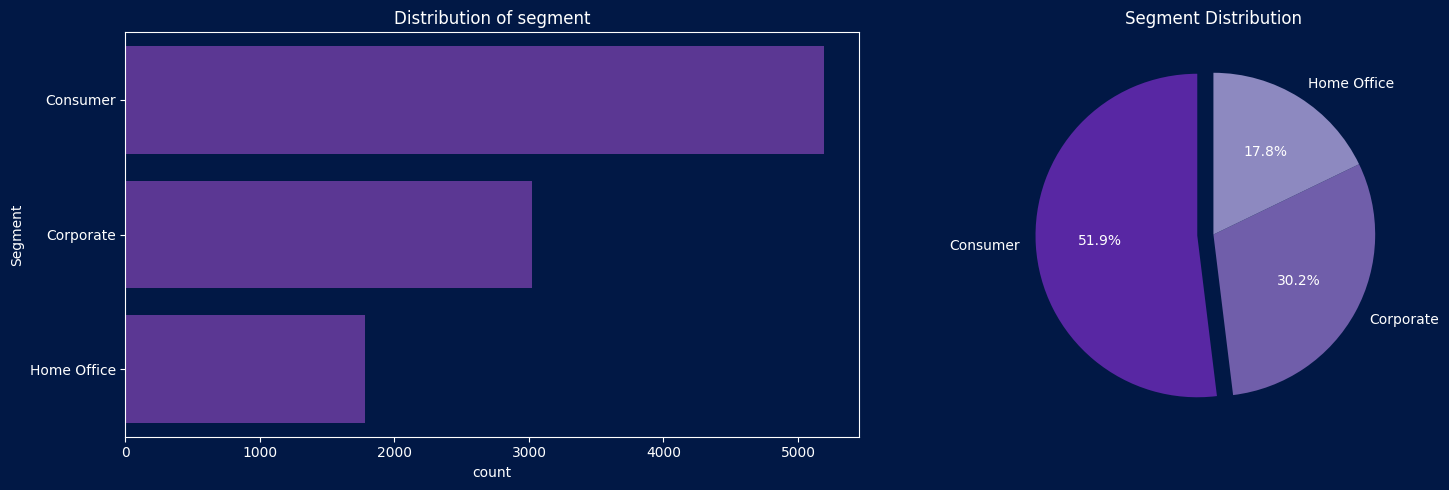

In [ ]:
#Segment Distribution:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Segment'], order=df['Segment'].value_counts().index,color=custom_palette[0])
plt.title("Distribution of segment")
plt.subplot(122)
Segment_counts = df['Segment'].value_counts()
explode = [0.1] + [0] * (len(Segment_counts) - 1)
plt.pie(Segment_counts, labels=Segment_counts.index, autopct='%1.1f%%', startangle=90, explode=explode,colors=[custom_palette[0],custom_palettee[4],custom_palettee[3],custom_palettee[2]])
plt.title("Segment Distribution")
plt.tight_layout()
plt.show()

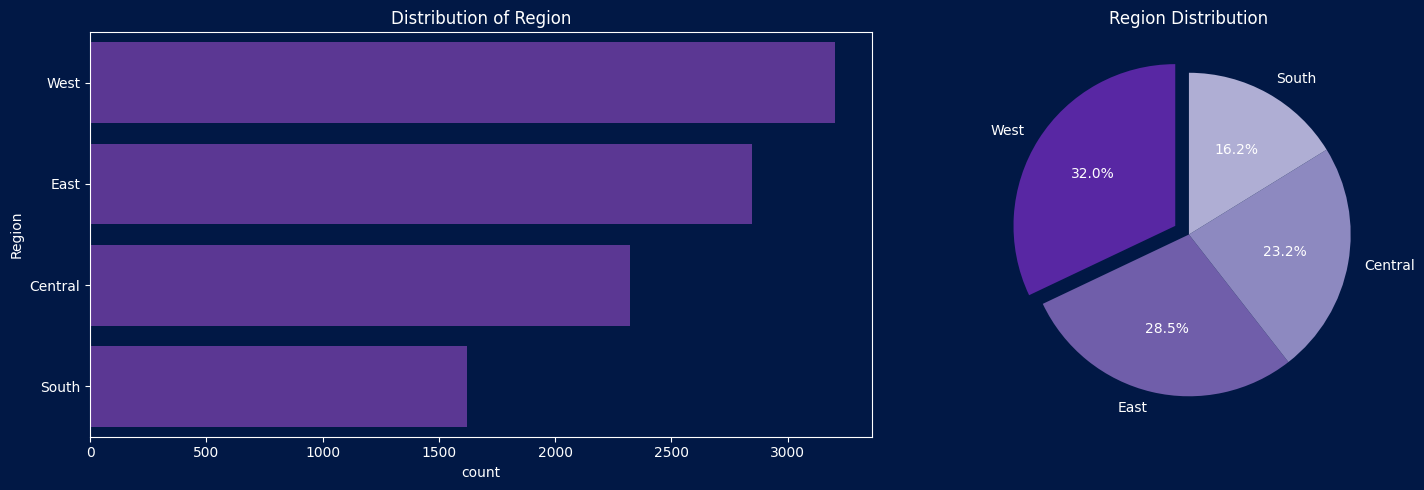

In [ ]:
#Region Distribution:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Region'], order=df['Region'].value_counts().index,color=custom_palette[0])
plt.title("Distribution of Region")
plt.subplot(122)
Region_counts = df['Region'].value_counts()
explode = [0.1] + [0] * (len(Region_counts) - 1)
plt.pie(Region_counts, labels=Region_counts.index, autopct='%1.1f%%', startangle=90, explode=explode,colors=[custom_palette[0],custom_palettee[4],custom_palettee[3],custom_palettee[2]])
plt.title("Region Distribution")
plt.tight_layout()
plt.show()

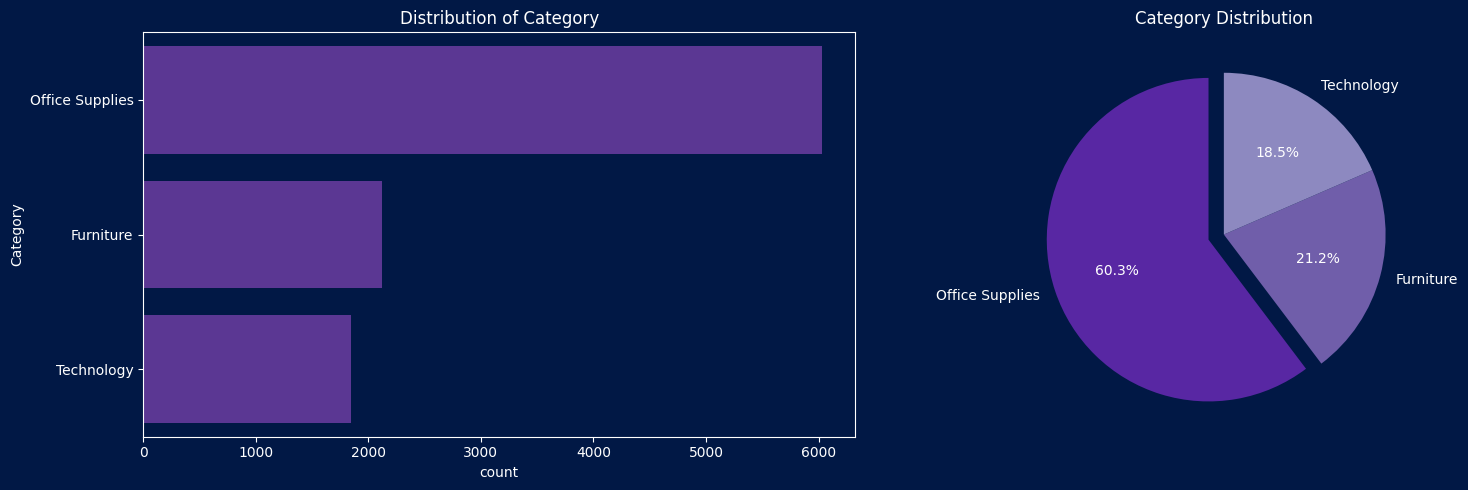

In [ ]:
#Category Distribution
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index,color=custom_palette[0])
plt.title("Distribution of Category")
plt.subplot(122)
Category_counts = df['Category'].value_counts()
explode = [0.1] + [0] * (len(Category_counts) - 1)
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%', startangle=90, explode=explode,colors=[custom_palette[0],custom_palettee[4],custom_palettee[3],custom_palettee[2]])
plt.title("Category Distribution")
plt.tight_layout()
plt.show()

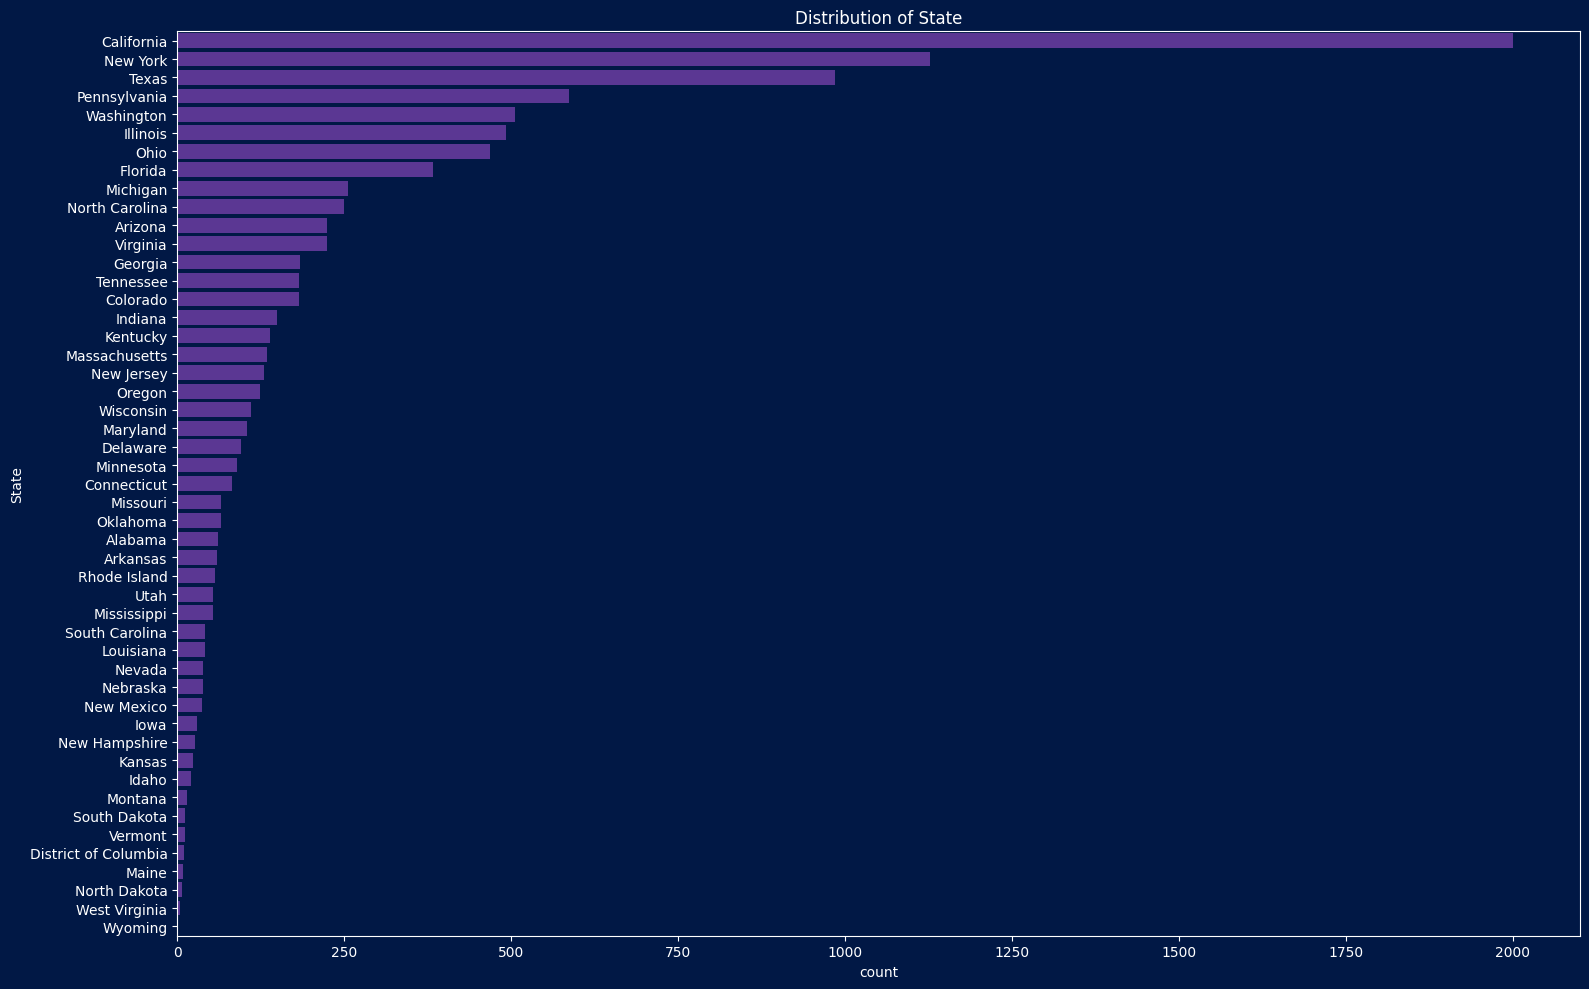

In [ ]:
# Distribution of state
plt.figure(figsize=(16, 10))
sns.countplot(y=df['State'], order=df['State'].value_counts().index,color=custom_palette[0])
plt.title("Distribution of State")
plt.tight_layout()
plt.show()

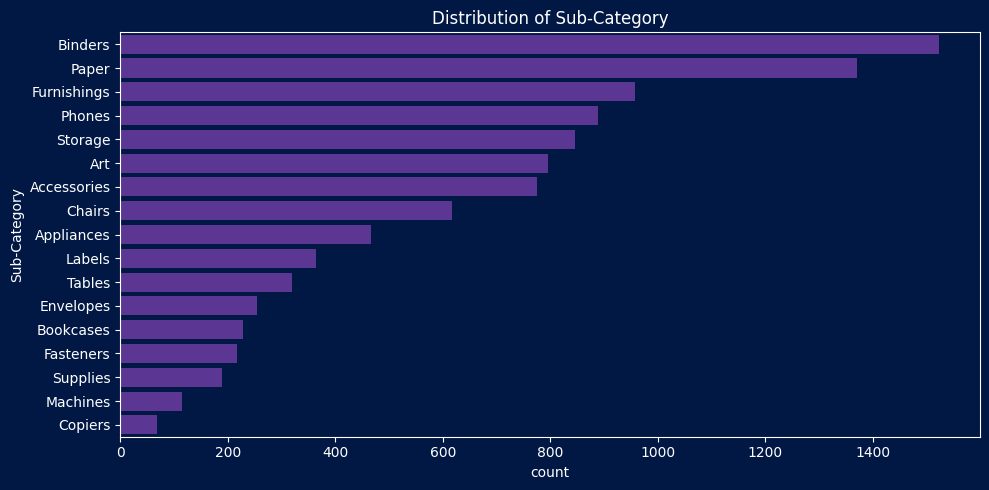

In [ ]:
# Distribution sub-Category
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Sub-Category'], order=df['Sub-Category'].value_counts().index,color=custom_palette[0])
plt.title("Distribution of Sub-Category")
plt.tight_layout()
plt.show()

**3. Top Entities**

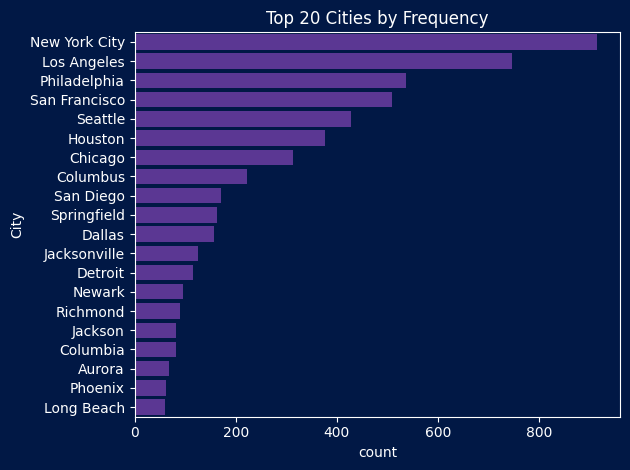

In [ ]:
#Top 20 Cities by Frequency
city_counts=df['City'].value_counts()
df_top_20_cities=df[df['City'].isin(city_counts.index[:20])]
sns.countplot(y=df_top_20_cities['City'],order=df_top_20_cities['City'].value_counts().index,color=custom_palette[0])
plt.title("Top 20 Cities by Frequency")
plt.tight_layout()
plt.show()

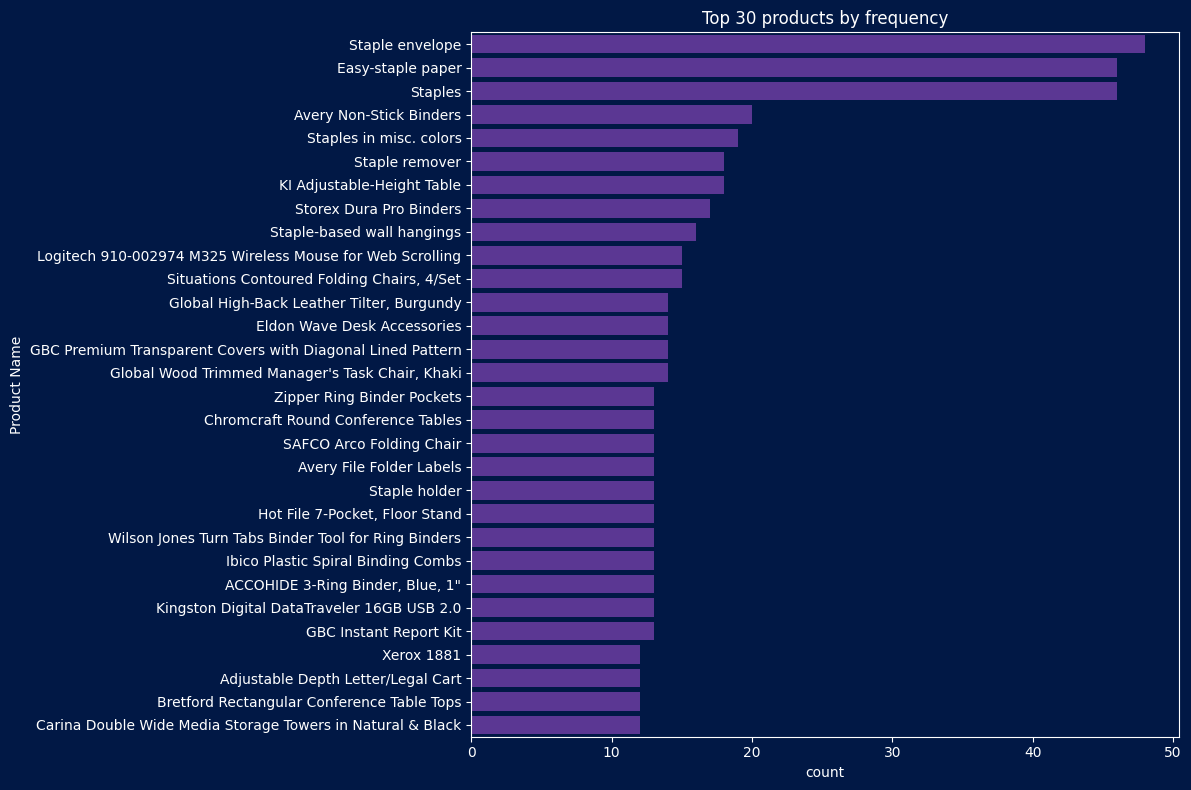

In [ ]:
#Top 30 Products by Frequency:
Product_counts=df['Product Name'].value_counts()
df_top_30_Product=df[df['Product Name'].isin(Product_counts.index[:30])]
plt.figure(figsize=(12, 8))
sns.countplot(y=df_top_30_Product['Product Name'], order=df_top_30_Product['Product Name'].value_counts().index,color=custom_palette[0])
plt.title("Top 30 products by frequency")
plt.tight_layout()
plt.show()

**4. Geographic Analysis**

In [ ]:
df_places = df[['City','State','Region','Sales','Profit']]

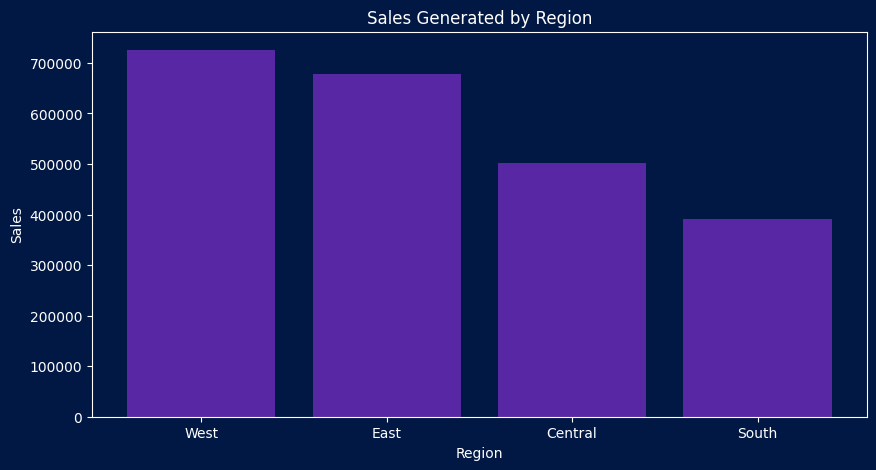

In [ ]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales geProfitnerated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',color=custom_palette[0])
plt.title("Sales Generated by Region")
plt.xlabel("Region")
plt.ylabel("Sales")


plt.show()

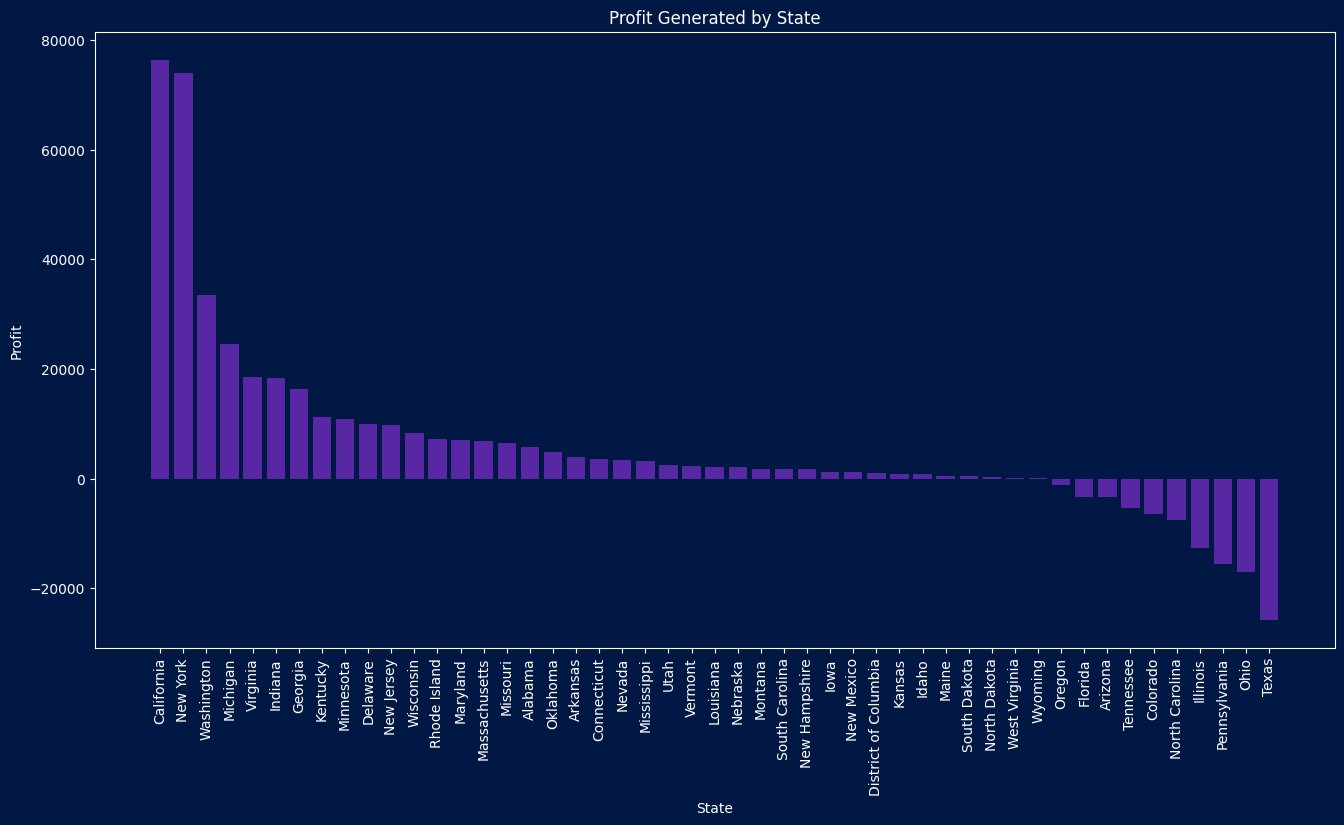

In [ ]:
# Group the data by State and City and calculate the total Profit for each group
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

plt.figure(figsize=(16,8))
plt.bar(grouped_data['State'], grouped_data['Profit'], align='center',color=custom_palette[0])
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()

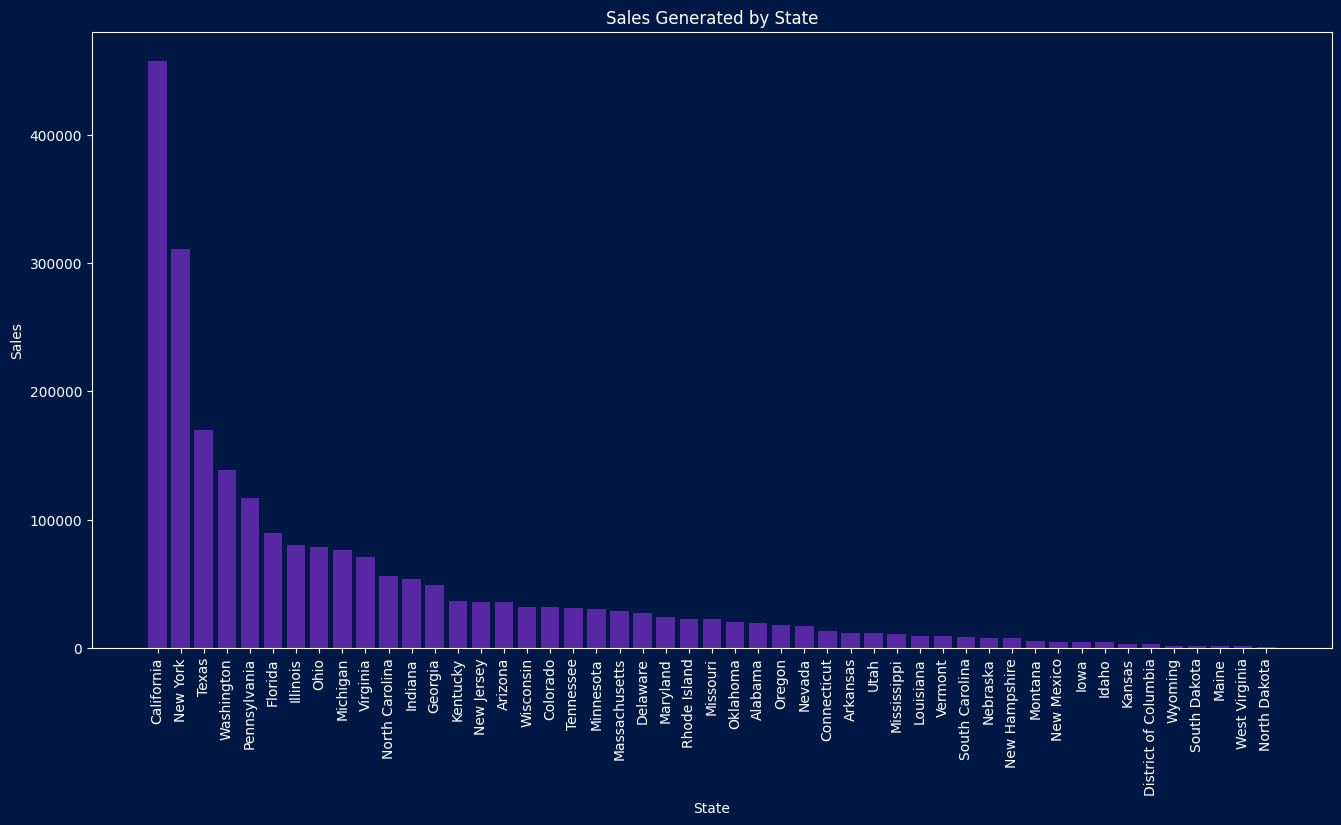

In [ ]:
# Group the data by State and City and calculate the total Sales for each group
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

plt.figure(figsize=(16,8))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',color=custom_palette[0])
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

4. Features Relationships

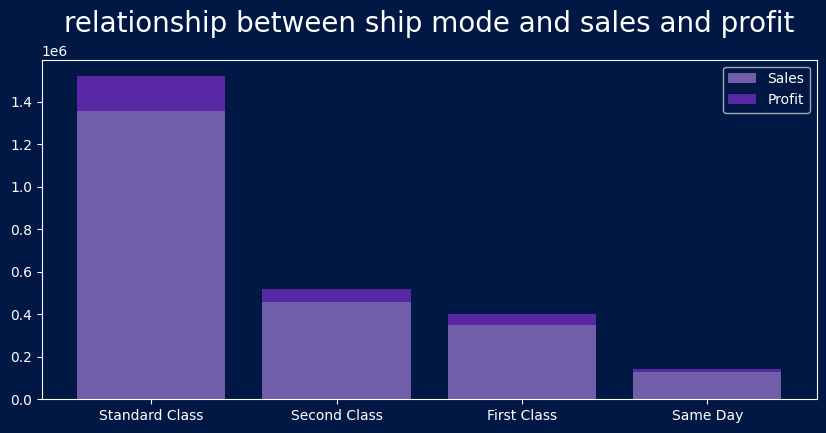

In [ ]:
df_relations = df[['Ship Mode','Sales','Profit']]
# relationship between ship mode and sales and profit

Ship_Mode_Sales_Profit = df_relations.groupby(['Ship Mode']).sum().reset_index(False)
Ship_Mode_Sales_Profit =Ship_Mode_Sales_Profit.sort_values('Sales', ascending=False)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.bar(x=Ship_Mode_Sales_Profit['Ship Mode'], height=Ship_Mode_Sales_Profit['Sales'],color=custom_palettee[4])
plt.bar(x=Ship_Mode_Sales_Profit['Ship Mode'], height=Ship_Mode_Sales_Profit['Profit'], bottom=Ship_Mode_Sales_Profit['Sales'],color=custom_palette[0])
plt.title("relationship between ship mode and sales and profit", size=20, pad=20)
plt.legend(['Sales','Profit'])

plt.show()

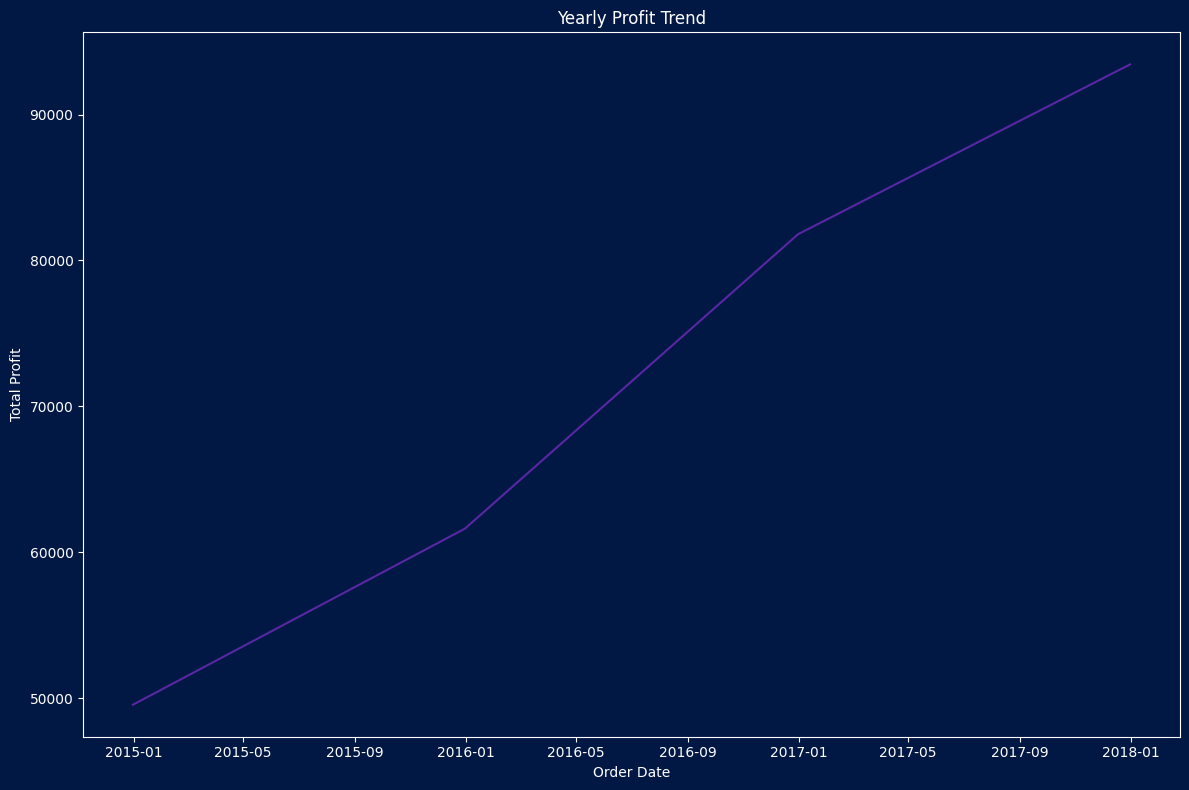

In [ ]:
Yearly_Profit=df.groupby('Order Date')['Profit'].sum()
Yearly_Profit=Yearly_Profit.resample('Y').sum()
plt.figure(figsize=(12, 8))
sns.lineplot(x=Yearly_Profit.index, y=Yearly_Profit.values,color=custom_palette[0])
plt.title('Yearly Profit Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

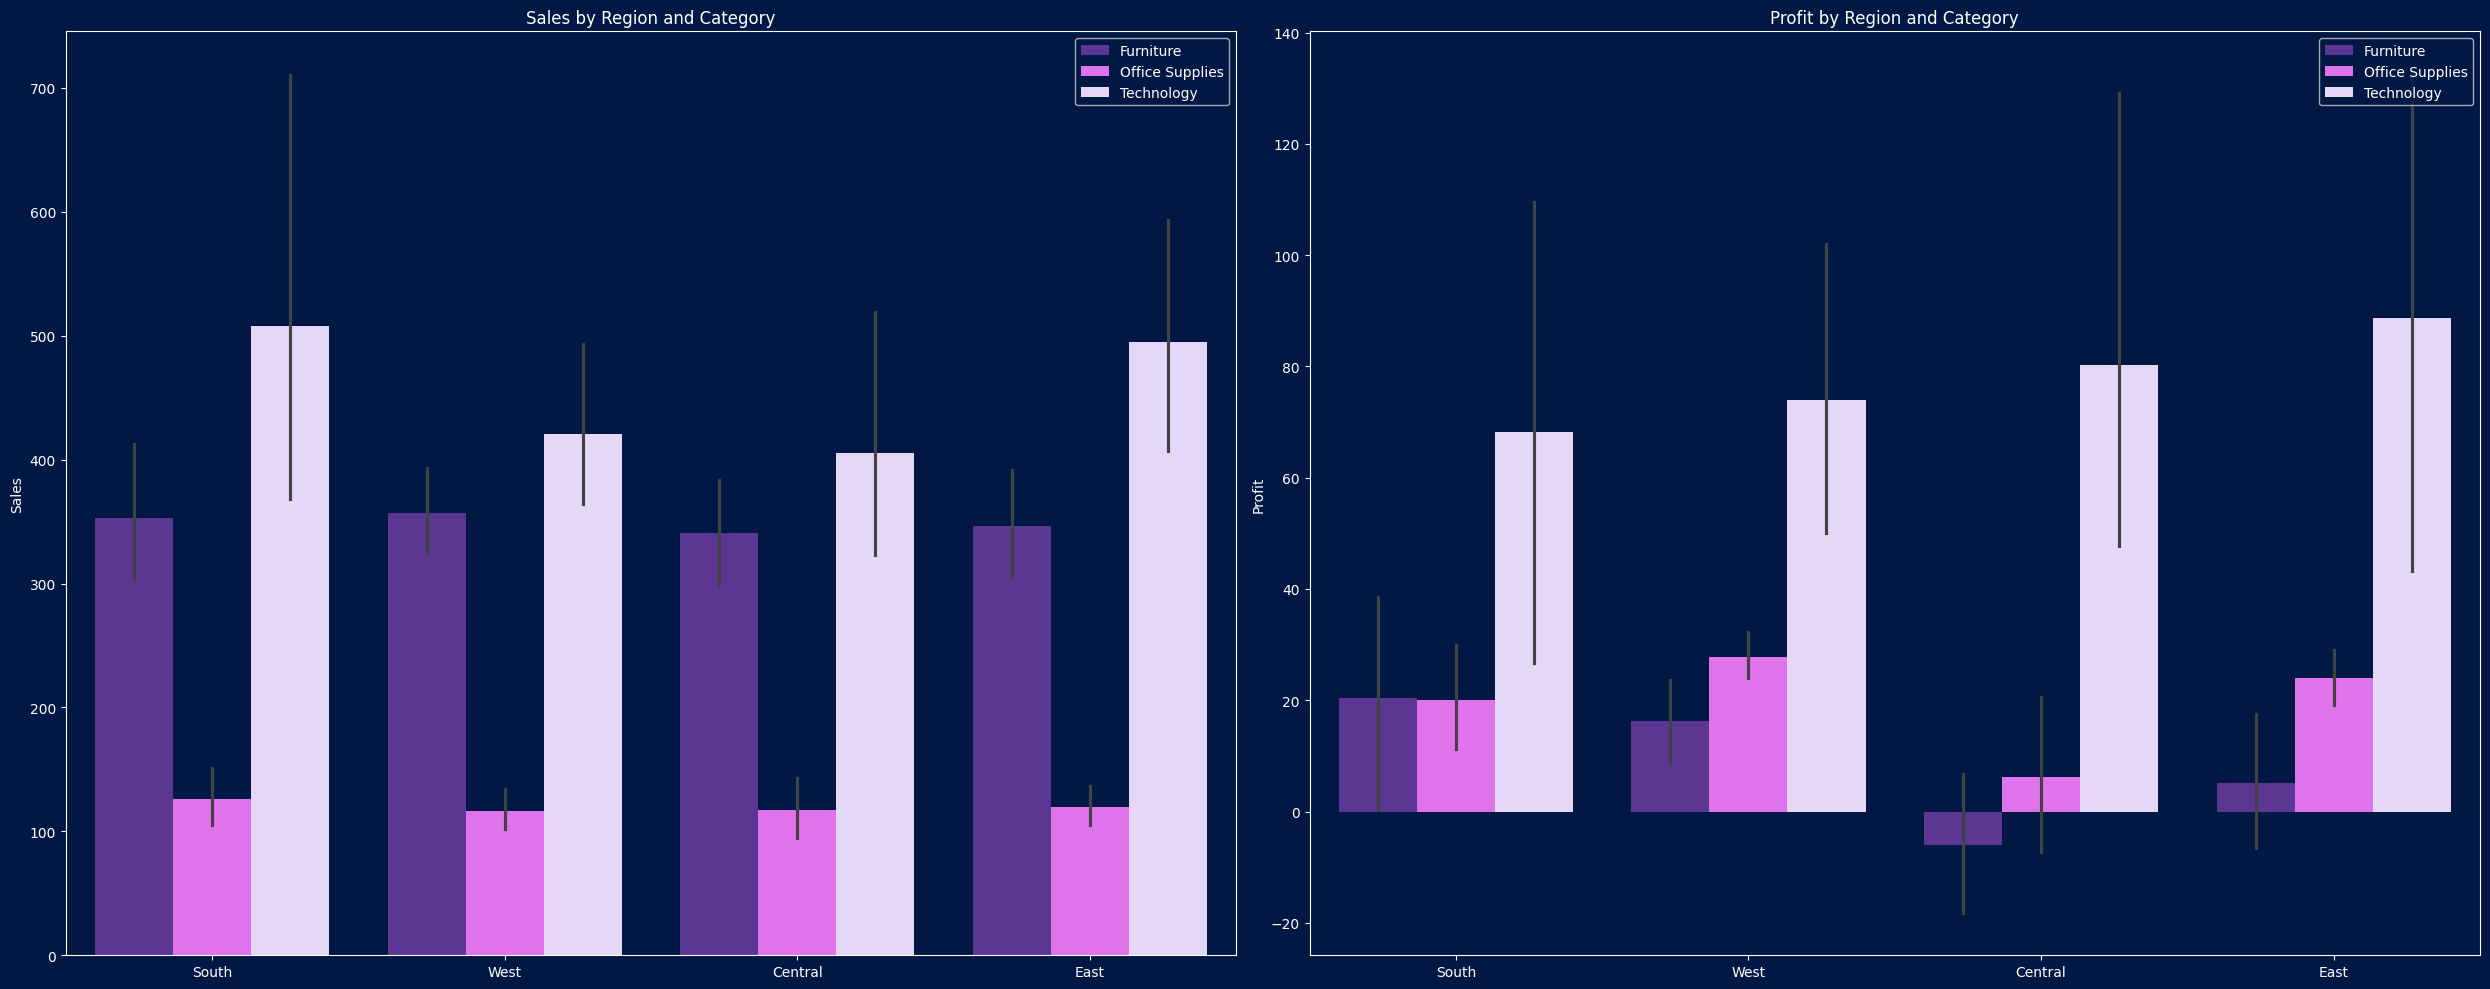

In [ ]:
#Sales and Profit by Region and Category
plt.figure(figsize=(25,10))

plt.subplot(121)


ax = sns.barplot(data=df, x='Region', hue='Category', y='Sales', palette=custom_palette)
plt.title('Sales by Region and Category')
plt.xlabel('')
plt.ylabel('Sales')
plt.legend(loc='upper right')

plt.subplot(122)
ax = sns.barplot(data=df, x='Region', hue='Category', y='Profit', palette=custom_palette)
plt.title('Profit by Region and Category')
plt.xlabel('')
plt.ylabel('Profit')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Additional insights**

In [ ]:
# Cross-tabulation of Category and Region
cross_tab = pd.crosstab(df['Category'], df['Region'])
print(cross_tab)

Region           Central  East  South  West
Category                                   
Furniture            481   601    332   707
Office Supplies     1422  1712    995  1897
Technology           420   535    293   599


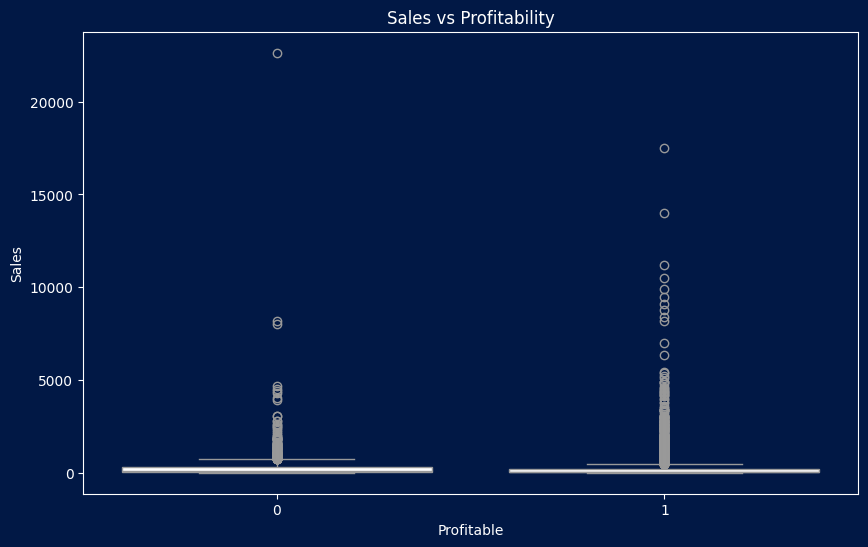

In [ ]:

# Sales vs. Profitability (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profitable', y='Sales', data=df,color="white")
plt.title('Sales vs Profitability')
plt.show()


In [ ]:
# Drop unnecessary columns
drop_columns = [
    'Row ID', 'Order ID', 'Customer ID', 'Customer Name',
    'Product ID', 'Product Name', 'Profit'
]
df = df.drop(drop_columns, axis=1)

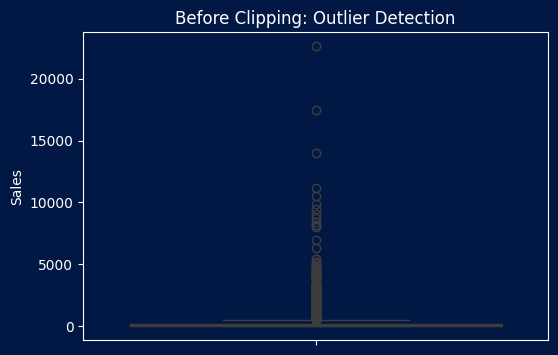

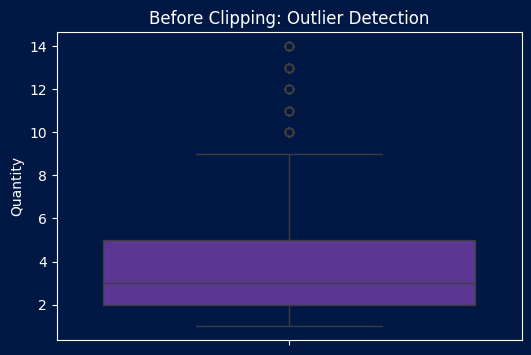

In [ ]:
def plot_outliers_before(col):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col],color='#5827A3')
    plt.title('Before Clipping: Outlier Detection')
    plt.show()

for col in ['Sales', 'Quantity'] :
  plot_outliers_before(col)

In [ ]:
# Step 2: More selective feature engineering
# Only transform significantly skewed features
numeric_columns = ['Sales', 'Quantity', 'Discount']  # Define columns to process

for col in numeric_columns:
    skew = df[col].skew()
    if abs(skew) > 1.5:  # Only transform highly skewed data
        df[f'{col}_log'] = np.log1p(df[col])

# Handle outliers with adaptive approach
for col in numeric_columns:
    if col == 'Discount':  # Skip clipping for Discount (bounded 0-1)
        print(f"Skipping outlier clipping for {col} (bounded feature)")
        continue

    # Use more aggressive percentiles for Sales/Quantity
    Q1, Q3 = df[col].quantile([0.10, 0.90])  # Changed from [0.05, 0.95]
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Diagnostic print before clipping
    print(f"\n--- {col} ---")
    print(f"Original range: {df[col].min():.2f} to {df[col].max():.2f}")
    print(f"Clipping bounds: {lower:.2f} to {upper:.2f}")

    # Clip and report changes
    n_outliers = len(df[(df[col] < lower) | (df[col] > upper)])
    df[col] = np.clip(df[col], lower, upper)
    print(f"Clipped {n_outliers} outliers ({n_outliers/len(df):.1%} of data)")
    print(f"New range: {df[col].min():.2f} to {df[col].max():.2f}")

# Simplified date feature extraction
for date_col in ['Order Date', 'Ship Date']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col])
        # Only keep the most relevant temporal features
        df[f'{date_col}_Month'] = df[date_col].dt.month
        df[f'{date_col}_Quarter'] = df[date_col].dt.quarter
        df[f'{date_col}_WeekDay'] = df[date_col].dt.dayofweek < 5  # Binary weekday flag

# Calculate shipping days more robustly
if 'Order Date' in df.columns and 'Ship Date' in df.columns:
    df['ShippingDays'] = (df['Ship Date'] - df['Order Date']).dt.days
    # Cap extreme values at 99th percentile
    upper_bound = df['ShippingDays'].quantile(0.99)
    df['ShippingDays'] = np.clip(df['ShippingDays'], 0, upper_bound)
    print(f"\nShippingDays capped at {upper_bound} days (99th percentile)")

# Drop original date columns
date_columns = ['Order Date', 'Ship Date']
df = df.drop(columns=[col for col in date_columns if col in df.columns])


--- Sales ---
Original range: 0.44 to 22638.48
Clipping bounds: -839.32 to 1419.92
Clipped 266 outliers (2.7% of data)
New range: 0.44 to 1419.92

--- Quantity ---
Original range: 1.00 to 14.00
Clipping bounds: -5.50 to 14.50
Clipped 0 outliers (0.0% of data)
New range: 1.00 to 14.00
Skipping outlier clipping for Discount (bounded feature)

ShippingDays capped at 7.0 days (99th percentile)


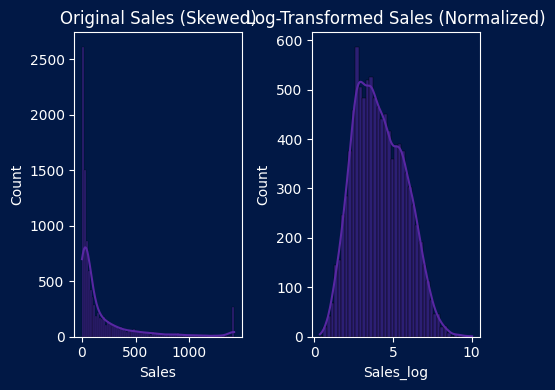

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 4))

# Before transformation (original 'Sales')
sns.histplot(df['Sales'], kde=True, ax=ax1, color="#5827A3")
ax1.set_title('Original Sales (Skewed)')
ax1.set_xlabel('Sales')
# After transformation ('Sales_log')
sns.histplot(df['Sales_log'], kde=True, ax=ax2, color='#5827A3')
ax2.set_title('Log-Transformed Sales (Normalized)')
ax2.set_xlabel('Sales_log')

plt.tight_layout()
plt.savefig('sales_distribution_comparison.png', dpi=300)
plt.show()

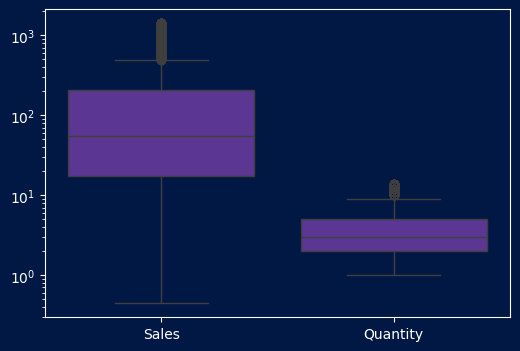

In [ ]:

def plot_outliers_after():
    plt.figure(figsize=(6, 4))  # Single plot per feature
    sns.boxplot(data=df[['Sales', 'Quantity']],color='#5827A3')
    plt.yscale('log')  # If using log-transformed features
    plt.show()


plot_outliers_after()

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
y = df['Profitable']

In [ ]:
df

,Postal Code,Sales,Quantity,Discount,Profitable,Sales_log,Discount_log,Order Date_Month,Order Date_Quarter,Order Date_WeekDay,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,1,5.572002,0.000000,11,4,True,...,False,False,False,False,False,False,False,False,False,False
1,42420,731.9400,3,0.00,1,6.597064,0.000000,11,4,True,...,False,False,False,False,False,False,False,False,False,False
2,90036,14.6200,2,0.00,1,2.748552,0.000000,6,2,False,...,False,False,False,True,False,False,False,False,False,False
3,33311,957.5775,5,0.45,0,6.865450,0.371564,10,4,False,...,False,False,False,False,False,False,False,False,False,True
4,33311,22.3680,2,0.20,1,3.151368,0.182322,10,4,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,33180,25.2480,3,0.20,1,3.267590,0.182322,1,1,True,...,False,False,True,False,False,False,False,False,False,False
9990,92627,91.9600,2,0.00,1,4.532169,0.000000,2,1,False,...,False,False,True,False,False,False,False,False,False,False
9991,92627,258.5760,2,0.20,1,5.559050,0.182322,2,1,False,...,False,False,False,False,False,False,True,False,False,False
9992,92627,29.6000,4,0.00,1,3.421000,0.000000,2,1,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# More aggressive correlation removal
def remove_highly_correlated_features(df, threshold=0.6):  # Lower threshold
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(to_drop, axis=1)

# Apply correlation removal
df = remove_highly_correlated_features(df)

In [ ]:
df

,Postal Code,Sales,Quantity,Discount,Order Date_Month,Order Date_WeekDay,Ship Date_WeekDay,ShippingDays,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,11,True,True,3,False,True,...,False,False,False,False,False,False,False,False,False,False
1,42420,731.9400,3,0.00,11,True,True,3,False,True,...,False,False,False,False,False,False,False,False,False,False
2,90036,14.6200,2,0.00,6,False,True,4,False,True,...,False,False,False,False,True,False,False,False,False,False
3,33311,957.5775,5,0.45,10,False,False,7,False,False,...,False,False,False,False,False,False,False,False,False,True
4,33311,22.3680,2,0.20,10,False,False,7,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,33180,25.2480,3,0.20,1,True,True,2,False,True,...,False,False,False,True,False,False,False,False,False,False
9990,92627,91.9600,2,0.00,2,False,True,5,False,False,...,False,False,False,True,False,False,False,False,False,False
9991,92627,258.5760,2,0.20,2,False,True,5,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,92627,29.6000,4,0.00,2,False,True,5,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:



# Split data with stratification

X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
# Scale features
scaler = RobustScaler()
numeric_features = X_train.select_dtypes(include=['number']).columns
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)


In [ ]:
# Feature selection based on importance
selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    threshold='median'
)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


In [ ]:


# Get names of selected features
selected_features = numeric_features[selector.get_support()]
print(f"Selected {len(selected_features)} out of {len(numeric_features)} features")

# First try a simpler model to establish baseline
print("Training baseline logistic regression...")
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, C=0.1)
lr_model.fit(X_train_selected, y_train)

# Evaluate baseline model
print("Baseline Model Performance:")
y_train_pred_lr = lr_model.predict(X_train_selected)
y_test_pred_lr = lr_model.predict(X_test_selected)
print(f"Training F1: {f1_score(y_train, y_train_pred_lr):.4f}")
print(f"Testing F1: {f1_score(y_test, y_test_pred_lr):.4f}")

Selected 3 out of 6 features
Training baseline logistic regression...
Baseline Model Performance:
Training F1: 0.9445
Testing F1: 0.9443


In [ ]:

# Train RandomForest with better parameters
print("Training RandomForest with adjusted parameters...")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 8],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Use stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_cv = RandomizedSearchCV(
    rf_model,
    rf_params,
    cv=skf,
    scoring='f1',
    n_iter=15,
    random_state=42,
    n_jobs=-1
)

# Fit model
rf_cv.fit(X_train_selected, y_train)
best_rf = rf_cv.best_estimator_

# Print best parameters
print(f"Best parameters: {rf_cv.best_params_}")
print(f"Best CV score: {rf_cv.best_score_:.4f}")
print(f"OOB score: {best_rf.oob_score_:.4f}")

# More rigorous evaluation with k-fold CV
cv_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=skf, scoring='f1')
print(f"5-Fold CV F1 Scores: {cv_scores}")
print(f"Mean CV F1: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")


Training RandomForest with adjusted parameters...
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 12, 'class_weight': 'balanced'}
Best CV score: 0.9415
OOB score: 0.9030
5-Fold CV F1 Scores: [0.94884488 0.93910122 0.94264339 0.93857083 0.93836478]
Mean CV F1: 0.9415, Std: 0.0040


In [ ]:
from sklearn.metrics import accuracy_score

# For Logistic Regression
print(f"LR Test Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")

# For Random Forest
print(f"RF Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Add to classification report
print("Full Metrics:\n", classification_report(y_test, y_test_pred, digits=4))

LR Test Accuracy: 0.9100
RF Test Accuracy: 0.9100
Full Metrics:
               precision    recall  f1-score   support

           0     0.7439    0.8161    0.7783       484
           1     0.9548    0.9325    0.9435      2015

    accuracy                         0.9100      2499
   macro avg     0.8493    0.8743    0.8609      2499
weighted avg     0.9139    0.9100    0.9115      2499



In [ ]:


# Final evaluation
print("Final Model Performance:")
y_train_pred = best_rf.predict(X_train_selected)
y_test_pred = best_rf.predict(X_test_selected)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Training F1: {train_f1:.4f}")
print(f"Testing F1: {test_f1:.4f}")
print(f"Overfitting Gap: {train_f1 - test_f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))



Final Model Performance:
Training F1: 0.9630
Testing F1: 0.9435
Overfitting Gap: 0.0195
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       484
           1       0.95      0.93      0.94      2015

    accuracy                           0.91      2499
   macro avg       0.85      0.87      0.86      2499
weighted avg       0.91      0.91      0.91      2499



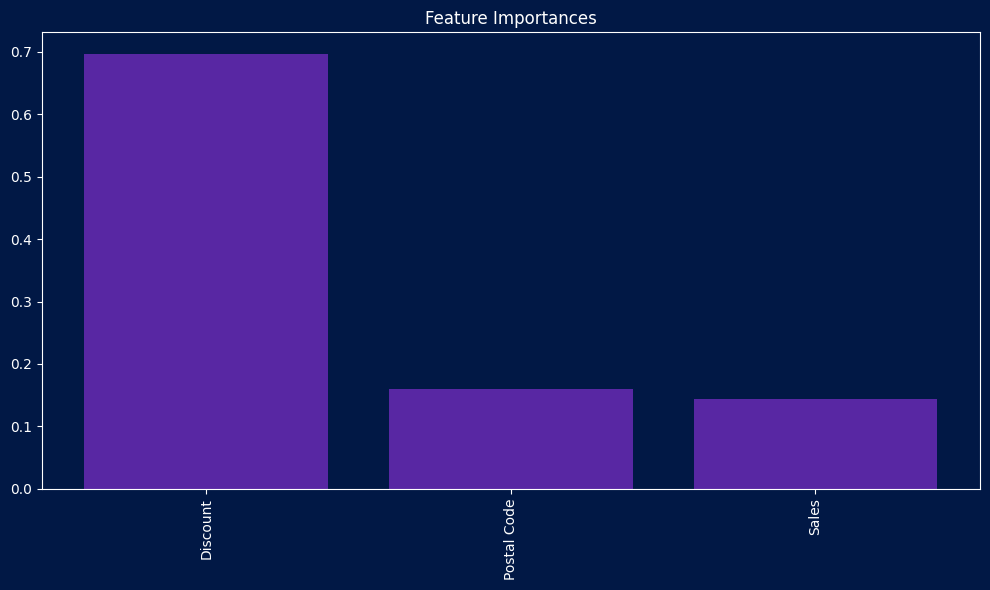

In [ ]:
# Calculate and plot feature importances for selected features
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_array = np.array(selected_features)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center",color=custom_palette[0])
plt.xticks(range(len(importances)), selected_features_array[indices], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

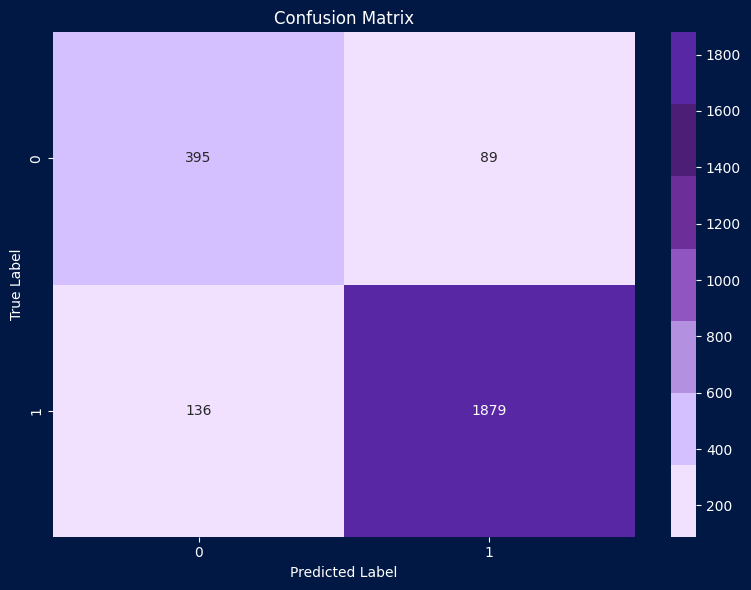

In [ ]:
# Plot confusion matrix

my_colors = [
   "#F1E1FF",  # Very light lavender
    "#D4BFFF",  # Soft lavender
    "#B390E0",  # Light purple
    "#9055C1",  # Medium purple
    "#6C2F99",  # Deep purple
    "#4D1E75",  # Rich dark purple
   custom_palette[0]  # Very dark purple
]
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=my_colors, cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



In [ ]:
# Save the final model and scaler
joblib.dump(best_rf, 'final_rf_model_improved.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selector, 'feature_selector.pkl')

print("Model training complete and artifacts saved.")

Model training complete and artifacts saved.


In [ ]:
import os
# Create results DataFrame for export

test_data = X_test.copy()
test_data['Actual_Profitable'] = y_test
test_data['Predicted_Profitable'] = y_test_pred
test_data['Prediction_Correct'] = test_data['Actual_Profitable'] == test_data['Predicted_Profitable']

# If the model has predict_proba method, get prediction probabilities
if hasattr(best_rf, 'predict_proba'):
    probabilities = best_rf.predict_proba(X_test_selected)
    test_data['Probability_Class0'] = probabilities[:, 0]
    test_data['Probability_Class1'] = probabilities[:, 1]





# Export results to CSV
test_data.to_csv('results/classification_results.csv', index=False)


print("Model training complete and all results saved.")
print("Results exported to classification_results.csv")




Model training complete and all results saved.
Results exported to classification_results.csv


In [ ]:
# Main execution point when run as a script
if __name__ == "__main__":
    print("Sales Classification Script Completed Successfully")